### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [56]:
# Dependencies and Setup
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# File to Load (Remember to Change These)
file_to_load = ("Resources/purchase_data.csv")

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data.count()




Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

## Player Count

#Display the total number of players


In [57]:
# To obtain unique players seperate by demographics then remove duplicates
# Loc will grab data from specific columns
# A player has a gender, Age, and Screen Name.
demographics = purchase_data.loc[:, ["Gender", "SN", "Age"]]
demographics = demographics.drop_duplicates() 

# Every count should be the same so do a value count
# alternate total_players = demographics.count()[0]
total_players = demographics["SN"].value_counts()

# Display number of players
total_players_df = pd.DataFrame({"Total Players": [total_players.sum()]})
total_players_df



,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [58]:
# Use Item ID, Item name, and Price 
catalog = purchase_data.loc[:, ["Purchase ID", "Item ID", "Item Name", "Price"]]

# Unique number of items, assume the item ID will differientiate types of the same product 
inventory = len(purchase_data["Item ID"].unique())

# Calculations needed for Purchase Analysis
avg_price = purchase_data["Price"].mean()
total_revenue = purchase_data["Price"].sum()
total_purchase = purchase_data["Purchase ID"].count()

# New Dataframe
inventory_report = pd.DataFrame({"Number of Unique Items": [inventory], 
                                 "Average Price": [avg_price], 
                                 "Number of Purchases": [total_purchase],
                                 "Total Revenue": [total_revenue] })

# Data munging and create variable for new table style and stored values
inventoy_report = inventory_report.round(2)
inventory_report ["Average Price"] = inventory_report["Average Price"].map("${:,.2f}".format)
inventory_report ["Number of Purchases"] = inventory_report["Number of Purchases"].map("{:,}".format)
inventory_report ["Total Revenue"] = inventory_report["Total Revenue"].map("${:,.2f}".format)
inventory_report = inventory_report.loc[:,["Number of Unique Items", "Average Price", "Number of Purchases", "Total Revenue"]]

inventory_report




,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [59]:
# Calculations for total and percent
num_players = total_players.sum()
gender_demo_totals= demographics["Gender"].value_counts()
gender_demo_percents = (gender_demo_totals/num_players)
percent = gender_demo_percents.map("{:.2%}".format)
gender_demo = pd.DataFrame({"Total Count": gender_demo_totals, "Percentage of Players": percent})

# Munging
gender_demo = gender_demo.round(4)
gender_demo

,Total Count,Percentage of Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


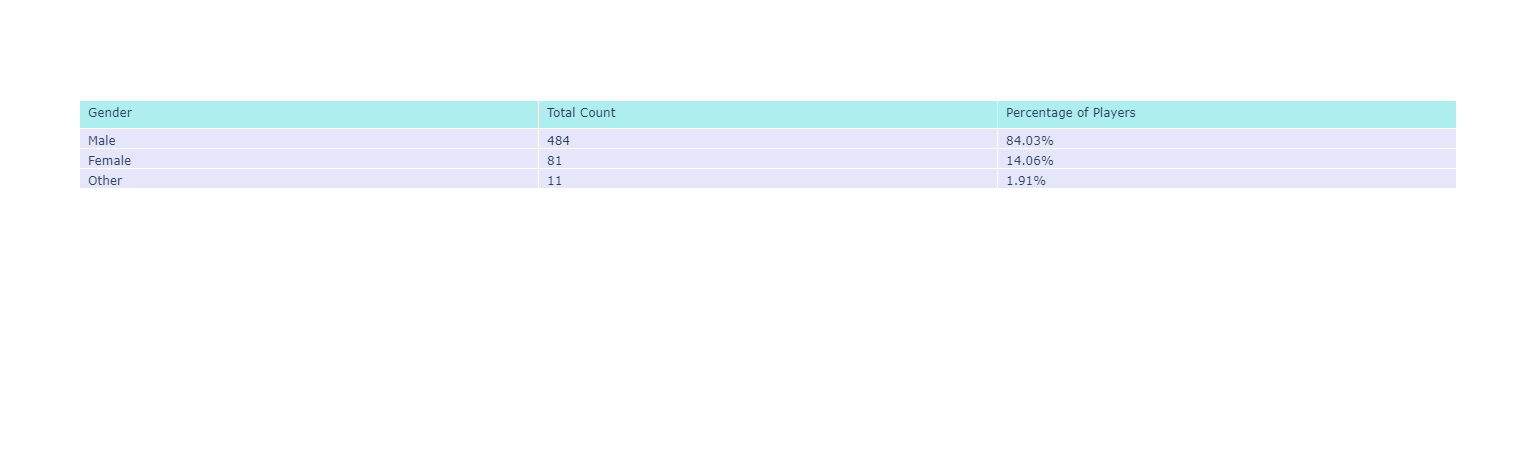

In [60]:
# Insert this list to add to new style format
gender_demo.insert(0, "Gender", ['Male', 'Female', 'Other'], True)

# New table style, combine format by formating in variables
fig = go.Figure(data=[go.Table(
    header=dict(values=list(gender_demo.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[ gender_demo["Gender"], gender_demo["Total Count"], gender_demo["Percentage of Players"]],
               fill_color='lavender',
               align='left'))
])


fig.show()




## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [61]:
# Run basic calculations
gender_purchase_total = purchase_data.groupby(["Gender"]).sum()["Price"].rename("Total Purchase Value")
gender_average = purchase_data.groupby(["Gender"]).mean()["Price"].rename("Average Purchase Price")
gender_counts = purchase_data.groupby(["Gender"]).count()["Price"].rename("Purchase Count")

# Calculate Normalized Purchasing
per_total = gender_purchase_total / gender_demo["Total Count"]

# Convert to DataFrame
gender_data = pd.DataFrame({"Purchase Count": gender_counts, "Average Purchase Price": gender_average, "Total Purchase Value": gender_purchase_total, "Average Total Purchase Per Person": per_total})

# Minor Data Munging
gender_data["Average Purchase Price"] = gender_data["Average Purchase Price"].map("${:,.2f}".format)
gender_data["Total Purchase Value"] = gender_data["Total Purchase Value"].map("${:,.2f}".format)
gender_data ["Purchase Count"] = gender_data["Purchase Count"].map("{:,}".format)
gender_data["Average Total Purchase Per Person"] = gender_data["Average Total Purchase Per Person"].map("${:,.2f}".format)
gender_data = gender_data.loc[:, ["Purchase Count", "Average Purchase Price", "Total Purchase Value", "Average Total Purchase Per Person"]]
gender_data

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase Per Person
Gender,,,,
Female,113,$3.20,$361.94,$4.47
Male,652,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,15,$3.35,$50.19,$4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [62]:
# Establish the bins 
age_bins = [0, 9.90, 14.90, 19.90, 24.90, 29.90, 34.90, 39.90, 99999]
group_names = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

# Categorize the existing players using the age bins
demographics["Age Ranges"] = pd.cut(demographics["Age"], age_bins, labels=group_names)

# Calculate the Numbers and Percentages by Age Group
age_demographics_totals = demographics["Age Ranges"].value_counts()
age_demographics_percents = age_demographics_totals / num_players 
adp_percent = age_demographics_percents.map("{:.2%}".format)
age_demographics = pd.DataFrame({"Total Count": age_demographics_totals, "Percentage of Players": adp_percent})

# Minor Data Munging
age_demographics = age_demographics.round(2)

# Display Age Demographics Table
age_demographics.sort_index()

,Total Count,Percentage of Players
<10,17,2.95%
10-14,22,3.82%
15-19,107,18.58%
20-24,258,44.79%
25-29,77,13.37%
30-34,52,9.03%
35-39,31,5.38%
40+,12,2.08%


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [66]:
# Bin the Purchasing Data
purchase_data["Age Ranges"] = pd.cut(purchase_data["Age"], age_bins, labels=group_names)

# Run basic calculations
age_purchase_total = purchase_data.groupby(["Age Ranges"]).sum()["Price"].rename("Total Purchase Value")
age_average = purchase_data.groupby(["Age Ranges"]).mean()["Price"].rename("Average Purchase Price")
age_counts = purchase_data.groupby(["Age Ranges"]).count()["Price"].rename("Purchase Count")

# Calculate Normalized Purchasing
age_demographics_total = age_purchase_total / age_demographics["Total Count"]

# Convert to DataFrame
#*** need to space better
age_data = pd.DataFrame({"Purchase Count": age_counts, "Average Purchase Price": age_average, "Total Purchase Value": age_purchase_total, "Average Total Purchase Per Person": age_demographics_total})

# Minor Data Munging
age_data["Average Purchase Price"] = age_data["Average Purchase Price"].map("${:,.2f}".format)
age_data["Total Purchase Value"] = age_data["Total Purchase Value"].map("${:,.2f}".format)
age_data ["Purchase Count"] = age_data["Purchase Count"].map("{:,}".format)
age_data["Average Total Purchase Per Person"] = age_data["Average Total Purchase Per Person"].map("${:,.2f}".format)
age_data = age_data.loc[:, ["Purchase Count", "Average Purchase Price", "Total Purchase Value", "Average Total Purchase Per Person" ]]

# Display the Age Table
age_data

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase Per Person
<10,23,$3.35,$77.13,$4.54
10-14,28,$2.96,$82.78,$3.76
15-19,136,$3.04,$412.89,$3.86
20-24,365,$3.05,"$1,114.06",$4.32
25-29,101,$2.90,$293.00,$3.81
30-34,73,$2.93,$214.00,$4.12
35-39,41,$3.60,$147.67,$4.76
40+,13,$2.94,$38.24,$3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [67]:

# Basic Calculations
user_total = purchase_data.groupby(["SN"]).sum()["Price"].rename("Total Purchase Value")
user_average = purchase_data.groupby(["SN"]).mean()["Price"].rename("Average Purchase Price")
user_count = purchase_data.groupby(["SN"]).count()["Price"].rename("Purchase Count")

# Convert to DataFrame
user_data = pd.DataFrame({"Total Purchase Value": user_total, "Average Purchase Price": user_average, "Purchase Count": user_count})

# Minor Data Munging
user_data["Average Purchase Price"] = user_data["Average Purchase Price"].map("${:,.2f}".format)
user_data["Total Purchase Value"] = user_data["Total Purchase Value"].map("${:,.2f}".format)
user_data = user_data.loc[:,["Purchase Count", "Average Purchase Price", "Total Purchase Value"]]


# Display Table
user_data.sort_values("Purchase Count", ascending= False ).head(5)

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,$3.79,$18.96
Iral74,4,$3.40,$13.62
Idastidru52,4,$3.86,$15.45
Asur53,3,$2.48,$7.44
Inguron55,3,$3.70,$11.11


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [74]:
# Extract item Data
item_data = purchase_data.loc[:,["Item ID", "Item Name", "Price"]]

# Perform basic calculations
total_item_purchase = item_data.groupby(["Item ID", "Item Name"]).sum()["Price"].rename("Total Purchase Value")
average_item_purchase = item_data.groupby(["Item ID", "Item Name"]).mean()["Price"].rename("Item Price")
item_count = item_data.groupby(["Item ID", "Item Name"]).count()["Price"].rename("Purchase Count")

# Minor Data Munging
item_data_pd = pd.DataFrame({"Total Purchase Value": total_item_purchase, "Item Price": average_item_purchase, "Purchase Count": item_count})
item_data_pd["Item Price"] = item_data_pd["Item Price"].map("${:,.2f}".format)
item_data_pd["Total Purchase Value"] = item_data_pd["Total Purchase Value"].map("${:,.2f}".format)
item_data_pd = item_data_pd.loc[:,["Purchase Count", "Item Price", "Total Purchase Value"]]

# Display the Item Table
item_data_pd.sort_values("Purchase Count", ascending=False).head()
#item_data_pd ["Purchase Count"] 


,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
132,Persuasion,9,$3.22,$28.99
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77


## Most Profitable Items.ipynb_checkpoints/

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [89]:
# New data and col
# Display the Item Table (Sorted by Total Purchase Value)

profit_data_pd = pd.DataFrame({"Purchase Count": item_count, "Item Price": average_item_purchase, "Total Purchase Value": total_item_purchase}).sort_values("Total Purchase Value", ascending=False).head()

# Minor Data Munging
profit_data_pd["Item Price"] = profit_data_pd["Item Price"].map("${:,.2f}".format)
profit_data_pd["Total Purchase Value"] = profit_data_pd["Total Purchase Value"].map("${:.2f}".format)
profit_data_pd = profit_data_pd.loc[:,["Purchase Count", "Item Price", "Total Purchase Value"]]

# Display the Item Table (Sorted by Total Purchase Value)
m_profit =profit_data_pd.sort_values("Total Purchase Value", ascending=False).head()

m_profit

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
92,Final Critic,13,$4.61,$59.99
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
103,Singed Scalpel,8,$4.35,$34.80
